<div style="text-align: center;">
    <h1>Applied Data Science</h1>
    <h3><em>Spring 2025</em></h3>
    <h2>Assignment 9 - Neural Networks</h2>
    <hr style="width:60%;">
    <h3>AmirReza Azari</h3>
    <p><em>Student ID: 99101087</em></p>
</div>

---

---
## Installing and Importing Libraries

In [15]:
import pandas as pd
import io
import os
import numpy as np
import copy
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
# !pip install catboost
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Loading the Dataset

In [2]:
# Uploading a dataset from the local machine into Google Colab
# This allows me to bring in the file I want to work with (e.g., a CSV file containing car data)

from google.colab import files
uploaded = files.upload()

# What I understood:
# This code opens a file picker so I can upload a file. Once uploaded, I can read it into a pandas DataFrame.

Saving bots_vs_users.csv to bots_vs_users.csv


In [48]:
df = pd.read_csv(io.BytesIO(uploaded['bots_vs_users.csv']))

## EDA:

In [49]:
df.shape

(5874, 60)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   has_domain                  5874 non-null   object 
 1   has_birth_date              5874 non-null   object 
 2   has_photo                   5874 non-null   object 
 3   can_post_on_wall            5874 non-null   object 
 4   can_send_message            5874 non-null   object 
 5   has_website                 5874 non-null   object 
 6   gender                      5874 non-null   object 
 7   has_short_name              5874 non-null   object 
 8   has_first_name              5874 non-null   object 
 9   has_last_name               5874 non-null   object 
 10  access_to_closed_profile    5874 non-null   object 
 11  is_profile_closed           5874 non-null   object 
 12  target                      5874 non-null   int64  
 13  has_nickname                5874 

In [51]:
df.describe()

,target,posts_count,avg_likes,links_ratio,hashtags_ratio,avg_keywords,avg_text_length,attachments_ratio,avg_comments,reposts_ratio,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness
count,5874.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,0.500000,18.629044,19.552487,0.156463,0.143918,7.730661,544.752035,0.895945,0.610812,0.433638,0.002667,623.834788,66.330065,0.000568,0.668009
std,0.500043,4.231994,41.954881,0.202730,0.187085,11.278711,746.728130,0.170084,2.461709,0.397830,0.033136,1617.635460,154.970296,0.009545,0.229815
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.400000,0.000000,0.000000,1.100000,86.600000,0.850000,0.000000,0.050000,0.000000,9.125000,1.980000,0.000000,0.580000
50%,0.500000,20.000000,7.600000,0.100000,0.050000,3.400000,267.800000,0.950000,0.000000,0.300000,0.000000,268.950000,30.950000,0.000000,0.710000
75%,1.000000,20.000000,26.075000,0.200000,0.200000,7.850000,616.850000,1.000000,0.200000,0.900000,0.000000,746.050000,89.480000,0.000000,0.830000
max,1.000000,20.000000,894.900000,1.000000,1.000000,61.600000,5841.250000,1.000000,64.050000,1.000000,0.950000,41415.700000,2866.590000,0.300000,1.000000


In [52]:
df.head(8)

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
6,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown
7,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,Unknown,Unknown


In [53]:
df.columns

Index(['has_domain', 'has_birth_date', 'has_photo', 'can_post_on_wall',
       'can_send_message', 'has_website', 'gender', 'has_short_name',
       'has_first_name', 'has_last_name', 'access_to_closed_profile',
       'is_profile_closed', 'target', 'has_nickname', 'has_maiden_name',
       'has_mobile', 'all_posts_visible', 'audio_available', 'has_interests',
       'has_books', 'has_tv', 'has_quotes', 'has_about', 'has_games',
       'has_movies', 'has_activities', 'has_music', 'can_add_as_friend',
       'can_invite_to_group', 'subscribers_count', 'is_blacklisted',
       'has_career', 'has_military_service', 'has_hometown', 'marital_status',
       'has_universities', 'has_schools', 'has_relatives', 'is_verified',
       'is_confirmed', 'has_status', 'posts_count', 'avg_likes', 'links_ratio',
       'hashtags_ratio', 'avg_keywords', 'avg_text_length',
       'attachments_ratio', 'avg_comments', 'reposts_ratio', 'ads_ratio',
       'avg_views', 'posting_frequency_days', 'phone_numbe

In [54]:
df.isnull().sum().sort_values(ascending=True).head(10)

,0
has_domain,0
has_birth_date,0
has_photo,0
can_post_on_wall,0
can_send_message,0
has_website,0
gender,0
has_short_name,0
has_first_name,0
has_last_name,0


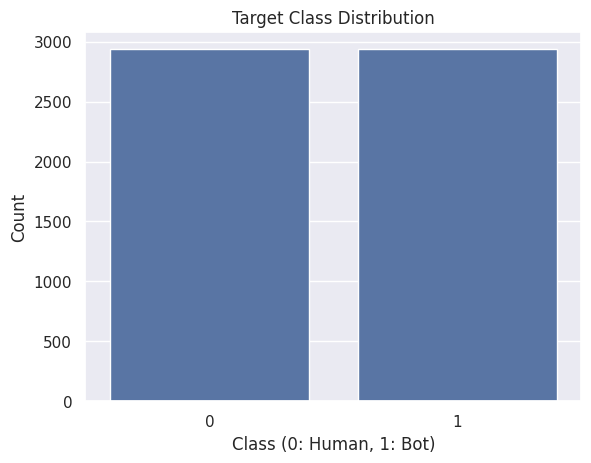

,proportion
target,
1,50.0
0,50.0


In [55]:
# Distribution of target variable (0 = human, 1 = bot)
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Class (0: Human, 1: Bot)')
plt.ylabel('Count')
plt.show()

# Display counts and percentages
df['target'].value_counts(normalize=True) * 100

In [56]:
# Separate numeric and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target column from numerical_cols
numerical_cols.remove('target')

print("Number of numerical features:", len(numerical_cols))
print("Number of categorical features:", len(categorical_cols))

Number of numerical features: 14
Number of categorical features: 45


In [57]:
# Fill numerical NaNs with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Confirm that categorical missing values are 'unknown'
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        print(f"{col} has missing values (not 'unknown')")

# Sanity check
print("Any remaining NaNs:", df.isnull().sum().sum())

Any remaining NaNs: 0


In [58]:
# Initialize label encoder
le = LabelEncoder()

# Apply Label Encoding to all categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Final shape check
df[categorical_cols].head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,has_schools,has_relatives,is_verified,is_confirmed,has_status,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
0,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
1,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
2,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
3,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1
4,0,0,0,0,0,0,1,0,0,1,...,2,2,2,2,2,319,1,2,2,1


In [59]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shape
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (4699, 59)
Test set: (1175, 59)


### <font color="gold"> XGBoost
First, let's set a benchmark by using XGBoost as a classifier and see what score we obtain

In [60]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.97


### <font color="gold"> Multilayer Perceptron Using Scikit-Learn
Now that we have the benchmark F1 score, let's go for a simple network: multilayer feedforward Perceptron model (i.e. neurons are binary).

For this simple architecture, we can use Scikit-Learn's MLPClassifier classifier:

In [78]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2),max_iter=7000)
model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=7000,
              solver='lbfgs')

In [79]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.91


In [63]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='macro')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.24978723404255318, 0.5, 0.33314415437003403, None)

In [64]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50, 20,10),max_iter=3500)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.87


In [65]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5),max_iter=500)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.94


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [66]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2),max_iter=1500,activation='logistic')
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions, average='macro'))

Macro F1-score is 0.91


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


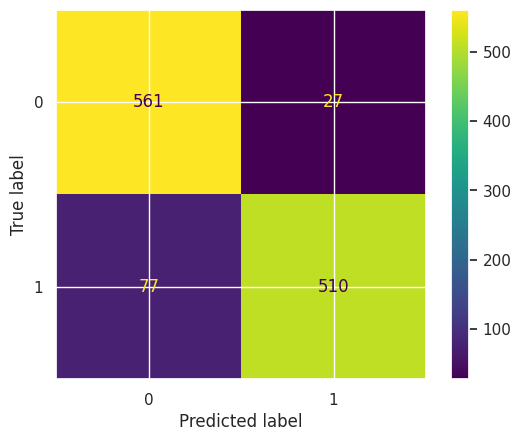

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [75]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

reg_model = MLPRegressor(hidden_layer_sizes=(5, 2), max_iter=1000)
reg_model.fit(X_train, y_train)
predictions_reg = reg_model.predict(X_test)
print("R² score: %.2f" % r2_score(y_test, predictions_reg))

R² score: 0.81


### <font color="gold"> Multi-layer Feedforward Networks with Keras
Next step would be create some networks, probably with more sophisticated architectures, using other available libraries.

We start with a similar multilayer feedforward network, built with Keras.

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks
import tensorflow as tf

In [81]:
model = Sequential()

# Add a layer with 30 hidden neurons
model.add(Dense(30, input_dim=X_train.shape[1], activation='sigmoid'))

# Add a layer with 10 hidden neurons
model.add(Dense(10, activation='relu'))

# Add a layer with 2 hidden neurons
model.add(Dense(3, activation='tanh'))

# Add the output layer, with sigmoid activation fuction (to predict the rain)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,          # minimium amount of change to be considered an improvement
    patience=20,              # number of epochs to wait before deciding there is no significant improvement in training
    restore_best_weights=True,
)

In [84]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
    )

In [85]:
history = model.fit(X_train, y_train,
                    batch_size = 16,
                    epochs = 150,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                    )

Epoch 1/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.6800 - precision: 0.5509 - recall: 0.9215 - val_loss: 0.5238 - val_precision: 0.7306 - val_recall: 0.8557
Epoch 2/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4767 - precision: 0.7732 - recall: 0.8622 - val_loss: 0.4114 - val_precision: 0.7815 - val_recall: 0.8701
Epoch 3/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3662 - precision: 0.8800 - recall: 0.8364 - val_loss: 0.3194 - val_precision: 0.9302 - val_recall: 0.8515
Epoch 4/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3285 - precision: 0.9172 - recall: 0.8338 - val_loss: 0.2755 - val_precision: 0.9450 - val_recall: 0.8495
Epoch 5/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2756 - precision: 0.9366 - recall: 0.8760 - val_loss: 0.2357 - val_precision: 0.9322 - val_recall: 0.9361
Epoch 6/150
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2465 - precision: 0.9191 - recall: 0.9278 - val_loss: 0.2564 - val_precision: 0.9084 - va

In [86]:
predictions = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test, predictions>0.4, average='macro'))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Macro F1-score is 0.94


In [90]:
# Regression model
reg_model = Sequential([
    Dense(30, input_dim=X_train.shape[1], activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1)  # No activation for regression output
])

reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

reg_model.fit(X_train, y_train, epochs=150, validation_split=0.2, callbacks=[early_stopping])

from sklearn.metrics import r2_score
y_pred_reg = reg_model.predict(X_test).flatten()
print("R² score: %.2f" % r2_score(y_test, y_pred_reg))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 755.1583 - mae: 16.6033 - val_loss: 57.5505 - val_mae: 3.3041
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 22.0618 - mae: 2.8198 - val_loss: 18.7357 - val_mae: 2.1594
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.6920 - mae: 1.9866 - val_loss: 44.1303 - val_mae: 2.0735
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9659 - mae: 1.7820 - val_loss: 31.3073 - val_mae: 1.7905
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.9060 - mae: 1.6976 - val_loss: 150.9839 - val_mae: 2.8853
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 204.8738 - mae: 7.4400 - val_loss: 15.4115 - val_mae: 1.2453
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.3174 - mae: 1.0766 - val_loss: 9.2162 - val_mae: 1.2131
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2092 - mae: 1.0690 - val_loss: 8.1226 - val_mae: 1.1448
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import tensorflow as tf

# Normalize features (if not already)
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_reg_scaled = scaler_X.fit_transform(X_train)
X_test_reg_scaled = scaler_X.transform(X_test)

# Optional: Normalize target if it's skewed
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()
y_train_reg_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_reg_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reg_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dense(1)  # No activation for regression output
])

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    min_delta=0.0001
)

# Fit model
history = model.fit(
    X_train_reg_scaled, y_train_reg_scaled,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0  # Make it 1 to see progress
)

# Evaluate
y_pred_scaled = model.predict(X_test_reg_scaled).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

from sklearn.metrics import r2_score
print("R² score: %.2f" % r2_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R² score: 0.89


#### <font color="gold">Same Architecture with PyTorch
Now that we have seen how we can use Keras to create neural networks, let's see how we can accomplish the same with PyTorch.

In [94]:
# Importing the necessary libraries
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor

In [95]:
# transform to torch tensor
tensor_X_train = Tensor(X_train.values.astype(np.float32))
tensor_y_train = Tensor(y_train.values.astype(np.float32))
tensor_X_test = Tensor(X_test.values.astype(np.float32))
tensor_y_test = Tensor(y_test.values.astype(np.float32))

# create the datset
train_set = TensorDataset(tensor_X_train,tensor_y_train)
test_set = TensorDataset(tensor_X_test,tensor_y_test)


# create your dataloader
train_dl = DataLoader(train_set,batch_size=32, shuffle=True)
test_dl = DataLoader(test_set,batch_size=32, shuffle=True)

In [96]:
layers = []
layers.append(nn.Linear(X_train.shape[1], 30))
layers.append(nn.ReLU())

layers.append(nn.Linear(30, 3))
layers.append(nn.Tanh())

layers.append(nn.Linear(3, 1))
layers.append(nn.Sigmoid())

model = nn.Sequential(*layers)
# define the optimization
from torch.nn import BCELoss
from torch.optim import Adam

criterion = BCELoss()
optimizer = Adam(model.parameters(), lr=0.0001)

In [97]:
# loop over the dataset multiple times
for epoch in range(100):

    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_dl):

        # clear the gradients
        optimizer.zero_grad()
        # compute the model output
        yhat = model(inputs)
        # calculate loss
        loss = criterion(yhat.ravel(), targets)

        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if not i % 5000:    # print every 2000 mini-batches
            print('[%d, %5d] F1 Score is: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,     1] F1 Score is: 0.000
[2,     1] F1 Score is: 0.000
[3,     1] F1 Score is: 0.000
[4,     1] F1 Score is: 0.000
[5,     1] F1 Score is: 0.000
[6,     1] F1 Score is: 0.000
[7,     1] F1 Score is: 0.000
[8,     1] F1 Score is: 0.000
[9,     1] F1 Score is: 0.000
[10,     1] F1 Score is: 0.000
[11,     1] F1 Score is: 0.000
[12,     1] F1 Score is: 0.000
[13,     1] F1 Score is: 0.000
[14,     1] F1 Score is: 0.000
[15,     1] F1 Score is: 0.000
[16,     1] F1 Score is: 0.000
[17,     1] F1 Score is: 0.000
[18,     1] F1 Score is: 0.000
[19,     1] F1 Score is: 0.000
[20,     1] F1 Score is: 0.000
[21,     1] F1 Score is: 0.000
[22,     1] F1 Score is: 0.000
[23,     1] F1 Score is: 0.000
[24,     1] F1 Score is: 0.000
[25,     1] F1 Score is: 0.000
[26,     1] F1 Score is: 0.000
[27,     1] F1 Score is: 0.000
[28,     1] F1 Score is: 0.000
[29,     1] F1 Score is: 0.000
[30,     1] F1 Score is: 0.000
[31,     1] F1 Score is: 0.000
[32,     1] F1 Score is: 0.000
[33,     1] F1 Sc

In [98]:
precision = 0
recall = 0
total_itr = 0
for i, (inputs, targets) in enumerate(test_dl):
    # evaluate the model on the test set
    yhat = model(inputs).ravel()
    pr,rc,f1,_ = precision_recall_fscore_support(yhat.detach().numpy()>0.4, targets.detach().numpy(), average='macro')
    precision += pr
    recall += rc
    total_itr += 1

precision /= total_itr
recall /= total_itr

print('Macro F1-score is %.2f' %(2*precision*recall/(precision+recall)))

Macro F1-score is 0.94


In [100]:
reg_model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

loss_fn = nn.MSELoss()
optimizer = Adam(reg_model.parameters(), lr=0.001)

# Training loop
for epoch in range(150):
    reg_model.train()
    for inputs, targets in train_dl:  # Use regression data loader here
        optimizer.zero_grad()
        outputs = reg_model(inputs).ravel()
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()


In [102]:
import torch

reg_model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for inputs, targets in test_dl:  # Use regression data loader
        preds = reg_model(inputs).ravel()
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

print("R² score: %.2f" % r2_score(all_targets, all_preds))

R² score: 0.84


In [103]:
from keras.models import Model
from keras.layers import Input, Dense
from keras import callbacks
import tensorflow as tf
from sklearn.metrics import f1_score

# Input layer
inputs = Input(shape=(X_train.shape[1],))

# Hidden layers
x = Dense(64, activation='relu')(inputs)   # Layer 1
x = Dense(32, activation='relu')(x)        # Layer 2
x = Dense(16, activation='relu')(x)        # Layer 3

# Output layer
outputs = Dense(1, activation='sigmoid')(x)  # Layer 4

# Build model
model = Model(inputs=inputs, outputs=outputs)

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Early stopping
early_stopping = callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=150,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=0)

# Predict and evaluate
preds = model.predict(X_test)
f1 = f1_score(y_test, preds > 0.4, average='macro')
print("Macro F1-score: %.2f" % f1)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Macro F1-score: 0.95


In [106]:
# 1. Scale the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# 2. Define the 4-layer regression model (non-sequential using Functional API)
inputs = Input(shape=(X_train_scaled.shape[1],))
x = Dense(128, activation='relu')(inputs)   # Layer 1
x = Dense(64, activation='relu')(x)         # Layer 2
x = Dense(32, activation='relu')(x)         # Layer 3
outputs = Dense(1)(x)                      # Layer 4 (output)

# 3. Build the model
reg_model = Model(inputs=inputs, outputs=outputs)

# 4. Compile the model with Adam optimizer and MSE loss function
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
reg_model.compile(optimizer=opt, loss='mse')

# 5. Early stopping callback to avoid overfitting
early_stopping = callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# 6. Train the model
reg_model.fit(X_train_scaled, y_train_scaled,
              validation_split=0.2,
              epochs=300,
              batch_size=32,
              callbacks=[early_stopping],
              verbose=0)

# 7. Make predictions and inverse-transform the results
y_pred_scaled = reg_model.predict(X_test_scaled)

# Inverse transform predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# 8. Calculate R² score
r2 = r2_score(y_test_actual, y_pred)
print("R² score: %.2f" % r2)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R² score: 0.86


---

## Why Neural Networks Are So Powerful and the Difficulties in Designing Them

### Why Neural Networks Are Powerful

Neural networks have become one of the most powerful tools in machine learning due to their ability to learn complex relationships from data. Here are a few key reasons why they are so effective:

#### 1. **Ability to Learn Non-Linear Relationships**
   Neural networks are highly capable of modeling non-linear relationships in data. Unlike traditional linear models, which assume a direct proportional relationship between inputs and outputs, neural networks can learn intricate patterns in data through layers of neurons. This non-linearity makes them suitable for tasks such as image recognition, speech processing, and more.

#### 2. **Feature Learning and Representation**
   Neural networks automatically learn useful features from raw data. For example, in image recognition tasks, neural networks can learn to recognize edges, textures, and higher-level features like shapes or objects without needing explicit feature extraction. This ability to learn features directly from the data allows neural networks to perform well on tasks where manual feature engineering would be time-consuming and complex.

#### 3. **Scalability**
   Neural networks, particularly deep learning models, can scale well with increasing amounts of data. As the dataset grows, neural networks can often improve their performance by learning more complex patterns. The vast number of parameters in deep networks enables them to capture intricate details in large datasets.

#### 4. **Versatility**
   Neural networks can be applied to a wide range of problems: from classification tasks (e.g., spam detection) to regression (e.g., predicting house prices) and even generative tasks (e.g., creating images). They have been proven effective in many fields, including computer vision, natural language processing, and reinforcement learning.

#### 5. **End-to-End Learning**
   Neural networks often allow for end-to-end learning, where the entire process from input to output is optimized simultaneously. This is particularly useful in complex systems where feature extraction and decision-making cannot be easily separated.

### The Difficulties in Designing Neural Networks

Despite their power, designing effective neural networks is not without challenges. Here are some of the main difficulties:

#### 1. **Choosing the Right Architecture**
   Selecting the optimal network architecture (e.g., the number of layers, number of neurons per layer, and activation functions) is not straightforward. The right architecture often depends on the specific problem at hand, and there is no one-size-fits-all solution. Experimenting with different architectures requires a deep understanding of the problem domain and can be time-consuming.

#### 2. **Overfitting and Underfitting**
   Neural networks have a large number of parameters, and if not properly regularized, they can overfit the training data. Overfitting occurs when a model learns to memorize the training data rather than generalize to unseen data. On the other hand, if the network is too simple, it may underfit the data, failing to capture important patterns. Striking the right balance between overfitting and underfitting is a key challenge.

#### 3. **Hyperparameter Tuning**
   Neural networks require the tuning of several hyperparameters, such as the learning rate, batch size, number of layers, and number of neurons per layer. Finding the optimal hyperparameter settings often requires extensive experimentation and is usually done via methods like grid search, random search, or Bayesian optimization. The tuning process is computationally expensive and can take a long time.

#### 4. **Training Time and Computational Resources**
   Training deep neural networks can be extremely resource-intensive, especially for large datasets. Neural networks with many layers or parameters may require significant computing power, often necessitating the use of GPUs or TPUs. Training time can also be long, even with modern hardware, making it difficult for practitioners without access to specialized infrastructure.

#### 5. **Data Quality and Quantity**
   Neural networks perform best with large amounts of high-quality data. In many cases, obtaining sufficient labeled data can be difficult or expensive. Moreover, neural networks can be sensitive to noisy or unbalanced data, which can degrade performance. Data preprocessing, cleaning, and augmentation are often necessary but can be time-consuming tasks.

#### 6. **Interpretability and Transparency**
   One of the biggest challenges with neural networks is their lack of interpretability. While the model can provide highly accurate predictions, understanding why a particular prediction was made is often difficult. This "black-box" nature of neural networks makes them less suitable for applications that require explanations for decisions, such as medical diagnoses or financial forecasting.

#### 7. **Vanishing and Exploding Gradients**
   In deep networks, especially those with many layers, gradients can either vanish or explode during backpropagation, making the training process unstable. The **vanishing gradient problem** occurs when gradients become very small, leading to slow or no learning in the earlier layers of the network. The **exploding gradient problem** occurs when gradients grow too large, causing the model weights to update too drastically and destabilizing training. Various techniques like batch normalization and careful weight initialization have been developed to mitigate these issues.

---

### Conclusion

Neural networks are powerful due to their flexibility, ability to model complex relationships, and capacity to learn features directly from raw data. However, designing effective neural networks is challenging, requiring careful attention to architecture, training, data quality, and computational resources. Despite these difficulties, advancements in neural network design and optimization continue to push the boundaries of machine learning, enabling breakthroughs across many domains.


---

In [107]:
X_train.head()

,has_domain,has_birth_date,has_photo,can_post_on_wall,can_send_message,has_website,gender,has_short_name,has_first_name,has_last_name,...,ads_ratio,avg_views,posting_frequency_days,phone_numbers_ratio,avg_text_uniqueness,city,has_occupation,occupation_type_university,occupation_type_work,has_personal_data
1121,0,0,1,0,0,0,1,0,0,1,...,0.0,268.95,30.95,0.0,0.71,18,0,1,0,0
5523,0,1,1,0,1,0,1,0,0,1,...,0.0,595.95,17.09,0.0,0.84,250,0,0,1,1
2040,0,0,0,0,0,0,2,0,0,1,...,0.0,268.95,30.95,0.0,0.71,11,1,2,2,1
745,0,0,0,0,0,0,1,0,0,1,...,0.0,268.95,30.95,0.0,0.71,319,1,2,2,1
3457,0,0,1,1,1,0,1,0,0,1,...,0.0,35.05,21.48,0.0,0.72,133,0,1,0,1


In [129]:
# Select one city (e.g., city 319) to simulate time-series by date
inds = X_train[X_train['city'] == 319].index

X_train_loc = X_train.loc[inds]
y_train_loc = y_train.loc[inds]

inds = X_test[X_test['city'] == 319].index
X_test_loc = X_test.loc[inds]
y_test_loc = y_test.loc[inds]


In [130]:
SEQ_LEN = 7
BATCH_SIZE = 16

# Classification Dataset
ds_train = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=X_train_loc,
    targets=y_train_loc,
    sequence_length=SEQ_LEN,
    sequence_stride=1,
    shuffle=True,
    batch_size=BATCH_SIZE,
)

ds_test = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=X_test_loc,
    targets=y_test_loc,
    sequence_length=SEQ_LEN,
    sequence_stride=1,
    shuffle=False,
    batch_size=BATCH_SIZE,
)

# Peek into shape
for batch in ds_train.take(1):
    inputs, targets = batch
    print(inputs.shape)  # (batch_size, sequence_length, num_features)


(16, 7, 59)


In [131]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(SEQ_LEN, X_train_loc.shape[1])))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 7, 64)          │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,585 (45.25 KB)

 Trainable params: 11,585 (45.25 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=150,
    callbacks=[early_stopping]
)


Epoch 1/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.4640 - precision_4: 0.8313 - recall_4: 0.9978 - val_loss: 0.4478 - val_precision_4: 0.8390 - val_recall_4: 1.0000
Epoch 2/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4411 - precision_4: 0.8338 - recall_4: 0.9998 - val_loss: 0.3654 - val_precision_4: 0.8987 - val_recall_4: 0.9616
Epoch 3/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3376 - precision_4: 0.9001 - recall_4: 0.9617 - val_loss: 0.3464 - val_precision_4: 0.9081 - val_recall_4: 0.9594
Epoch 4/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3277 - precision_4: 0.9133 - recall_4: 0.9568 - val_loss: 0.3214 - val_precision_4: 0.9261 - val_recall_4: 0.9616
Epoch 5/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.3348 - precision_4: 0.9061 - recall_4: 0.9577 - val_loss: 0.3478 - val_precision_4: 0.9145 - val_recall_4: 0.9661
Epoch 6/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3223 - precision_4: 0.9108 - recall_4: 0.9653 

In [133]:
from sklearn.metrics import f1_score
import numpy as np

y_true = []
y_pred = []

for batch in ds_test:
    inputs, targets = batch
    preds = model.predict(inputs)
    y_true.extend(targets.numpy())
    y_pred.extend((preds > 0.5).astype(int))

f1 = f1_score(y_true, y_pred, average='macro')
print(f"Macro F1-score: {f1:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━

In [139]:
from sklearn.preprocessing import StandardScaler

# Scale X
scaler_X = StandardScaler()
X_train_loc_scaled = scaler_X.fit_transform(X_train_loc)
X_test_loc_scaled = scaler_X.transform(X_test_loc)

# Scale y
scaler_y = StandardScaler()
y_train_loc_scaled = scaler_y.fit_transform(y_train_loc.values.reshape(-1, 1))
y_test_loc_scaled = scaler_y.transform(y_test_loc.values.reshape(-1, 1))


In [140]:
SEQ_LEN = 7
BATCH_SIZE = 16

# Build time series datasets for regression
ds_train_reg = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=X_train_loc,
    targets=y_train_loc,
    sequence_length=SEQ_LEN,
    sequence_stride=1,
    shuffle=True,
    batch_size=BATCH_SIZE,
)

ds_test_reg = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=X_test_loc,
    targets=y_test_loc,
    sequence_length=SEQ_LEN,
    sequence_stride=1,
    shuffle=False,
    batch_size=BATCH_SIZE,
)


In [141]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model_reg = Sequential()
model_reg.add(SimpleRNN(64, return_sequences=True, input_shape=(SEQ_LEN, X_train_loc.shape[1])))
model_reg.add(SimpleRNN(32, return_sequences=False))
model_reg.add(Dense(16, activation='relu'))
model_reg.add(Dense(1))  # Regression output, no activation

model_reg.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)

model_reg.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 7, 64)          │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,585 (45.25 KB)

 Trainable params: 11,585 (45.25 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
history_reg = model_reg.fit(
    ds_train_reg,
    validation_data=ds_test_reg,
    epochs=150,
    callbacks=[early_stopping]
)


Epoch 1/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2342 - root_mean_squared_error: 0.4753 - val_loss: 0.1415 - val_root_mean_squared_error: 0.3762
Epoch 2/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1588 - root_mean_squared_error: 0.3984 - val_loss: 0.1394 - val_root_mean_squared_error: 0.3734
Epoch 3/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1571 - root_mean_squared_error: 0.3963 - val_loss: 0.1398 - val_root_mean_squared_error: 0.3739
Epoch 4/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1524 - root_mean_squared_error: 0.3902 - val_loss: 0.1381 - val_root_mean_squared_error: 0.3716
Epoch 5/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1546 - root_mean_squared_error: 0.3931 - val_loss: 0.1438 - val_root_mean_squared_error: 0.3792
Epoch 6/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1511 - root_mean_squared_error: 0.3886 - val_loss: 0.1407 - val_root_mean_squared_error: 0.3750
Epoch 7/150
140/140 ━━━━━━━━━━━━━━━━━━━━

In [143]:
from sklearn.metrics import r2_score
import numpy as np

y_true_reg = []
y_pred_reg = []

for batch in ds_test_reg:
    inputs, targets = batch
    preds = model_reg.predict(inputs)
    y_true_reg.extend(targets.numpy())
    y_pred_reg.extend(preds)

r2 = r2_score(y_true_reg, y_pred_reg)
print(f"R² score: {r2:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━